# Data Storytelling in Pattern Recognition

## Food Production and Supply/Consumption in African Countries between 2004 and 2013

#### Import Libraries

In [1]:
pip install plotly --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Load and Inspect the Food Production and Food Supply Datasets

In [3]:
Supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
Production = pd.read_csv('Africa Food Production (2004 - 2013).csv')

In [4]:
Supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
Production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [6]:
Supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [7]:
Production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [8]:
len(Supply['Country'].unique())

45

In [9]:
len(Production['Country'].unique())

45

In [10]:
len(Production['Item'].unique())

94

From the inspection of the two datasets we can observe that the Supply dataset has 3 fields while the Production dataset has 4 fields

Both Supply and Production datasets have 45 coutries

Production dataset has 94 unique Food Items in the Item field

### Trends in food production and consumption over the years

Create a dataframe grouping each of the datasets by year

In [11]:
Production_Year = Production.groupby(['Year'], as_index=False)['Value'].sum()
Supply_Year = Supply.groupby(['Year'], as_index=False)['Value'].sum()

In [12]:
Production_Year.head()

,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804


In [13]:
Supply_Year.head()

,Year,Value
0,2004,107740
1,2005,108418
2,2006,109386
3,2007,110149
4,2008,110734


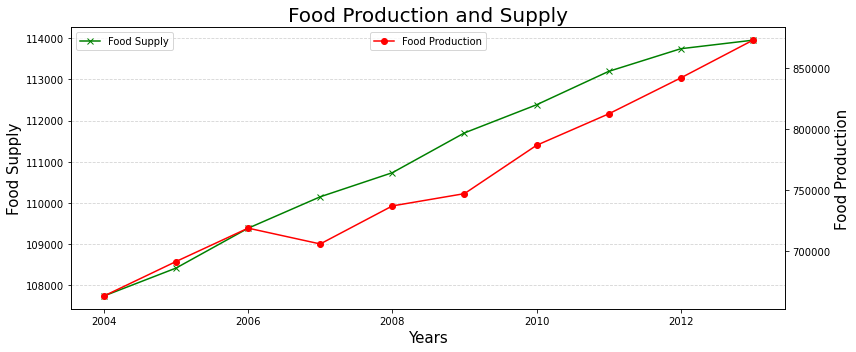

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Food Production and Supply', fontsize=20)
ax.set_xlabel('Years', fontsize=15)

ax.plot(Supply_Year['Year'], Supply_Year['Value'], color='green', marker='x')
ax2.plot(Production_Year['Year'], Production_Year['Value'], color='red', marker='o')

ax.set_ylabel('Food Supply', fontsize=15)
ax2.set_ylabel('Food Production', fontsize=15)

ax.legend(['Food Supply'])
ax2.legend(['Food Production'], loc='upper center')

ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

There was a steady upward trend in Food Supply since 2004 with a 5.76% increase

Food production dropped in 2007 but jumped back up in 2008 and steadily increased till 2013 showing an overall 31.61% increase in Food Production

The graph above shows that Food Production surpased Food Supply between 2004 - 2013

### Contribution of Each Country to Food Supply and Production

Create a dataframe grouping each of the datasets by Country

In [15]:
Production_Country = Production.groupby('Country', as_index = False)['Value'].sum()
Supply_Country = Supply.groupby('Country', as_index = False)['Value'].sum()

In [16]:
Production_Country.head()

,Country,Value
0,Algeria,188650
1,Angola,195499
2,Benin,88072
3,Botswana,4808
4,Burkina Faso,100129


In [17]:
Supply_Country.head()

,Country,Value
0,Algeria,31118
1,Angola,22556
2,Benin,25378
3,Botswana,22263
4,Burkina Faso,26072


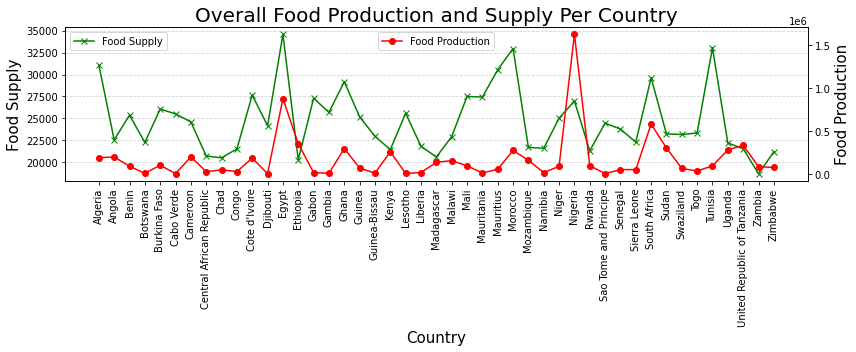

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()

ax.set_title('Overall Food Production and Supply Per Country', fontsize=20)
ax.set_xlabel('Country', fontsize=15)

ax.plot(Supply_Country['Country'], Supply_Country['Value'], color='green', marker='x')
ax2.plot(Production_Country['Country'], Production_Country['Value'], color='red', marker='o')

ax.set_ylabel('Food Supply', fontsize=15)
ax2.set_ylabel('Food Production', fontsize=15)

ax.legend(['Food Supply'])
ax2.legend(['Food Production'], loc='upper center')

ax.set_xticks(Supply_Country['Country'])
ax.set_xticklabels(Supply_Country['Country'], rotation=90)

ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.tight_layout()
plt.show()

The graph above shows thecontribution of each of the country to the overall Food Supply and Food production between 2004 and 2013

Egypt, Morocco and Tunisia are the top 3 contributors to overall Food supply while Egypt, Nigeria and South Africa are the top 3 Food Producers

### Average and median food production showing the outliers, Quartile and interquartile ranges

In [19]:
Production_Non_Zero= Production[Production['Value'] != 0]

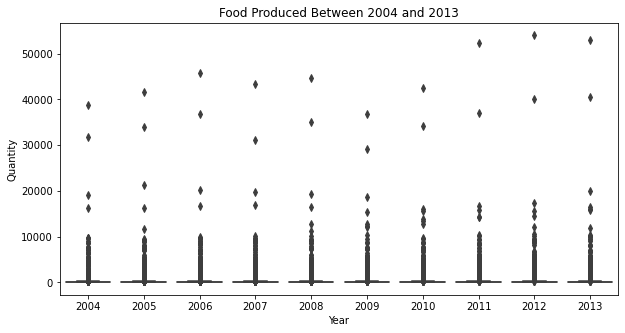

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(data=Production_Non_Zero, x= 'Year', y='Value')

plt.title('Food Produced Between 2004 and 2013')
plt.ylabel('Quantity')
plt.show()

The graph above shows that the Food Production dataset has a wide range of values and most values lie above the third quartile(Q3)

### Average and median food Supply showing the outliers, Quartile and interquartile ranges

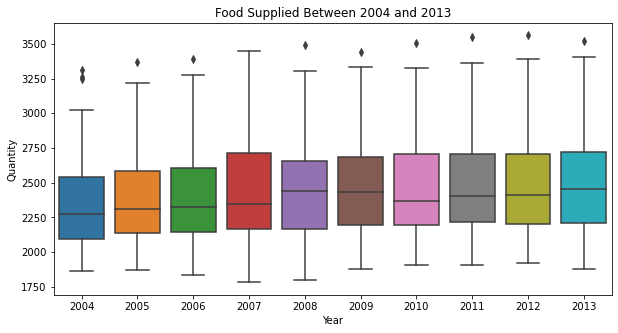

In [21]:
plt.figure(figsize=(10,5))

sns.boxplot(x= 'Year', y='Value', data= Supply)

plt.title('Food Supplied Between 2004 and 2013')
plt.ylabel('Quantity')
plt.show()

In [22]:
Supply_Outlier = Supply[Supply['Value'] > 3000]

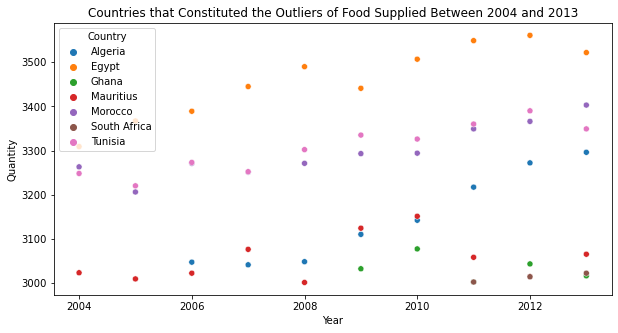

In [23]:
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'Year', y='Value', data= Supply_Outlier, hue= 'Country' )

plt.title('Countries that Constituted the Outliers of Food Supplied Between 2004 and 2013')
plt.ylabel('Quantity')
plt.show()

The above graphs show that most of the Food Supply dataset lies between the upper fence and lower fence with very few outliers. The countries that constitute the outliers between 2004 and 2012 are: Algeria, Egypt, Ghana, Mauritius, Morocco, South Africa and Tunisia

### Countries and the Food Items they produce

In [24]:
# create a duplicate of the Production dataset to ensure changes made do not affect the original dataframe
Production_Produce = Production.copy()

#Items with 0 as Value means that the Country did not produce those items, so it is dropped
Production_Produce = Production_Produce[Production_Produce['Value']!=0]

Production_Produce = Production_Produce.groupby(['Country','Item']).count()

#the year and Value colummns are not needed
Production_Produce1 = Production_Produce.drop(columns = ['Year', 'Value'])

#to access the Country and Item columns, they have to be removed as indexes
Production_Produce1 = Production_Produce1.reset_index()

Production_Produce1.head()

,Country,Item
0,Algeria,Apples and products
1,Algeria,Barley and products
2,Algeria,Beans
3,Algeria,Beer
4,Algeria,Bovine Meat


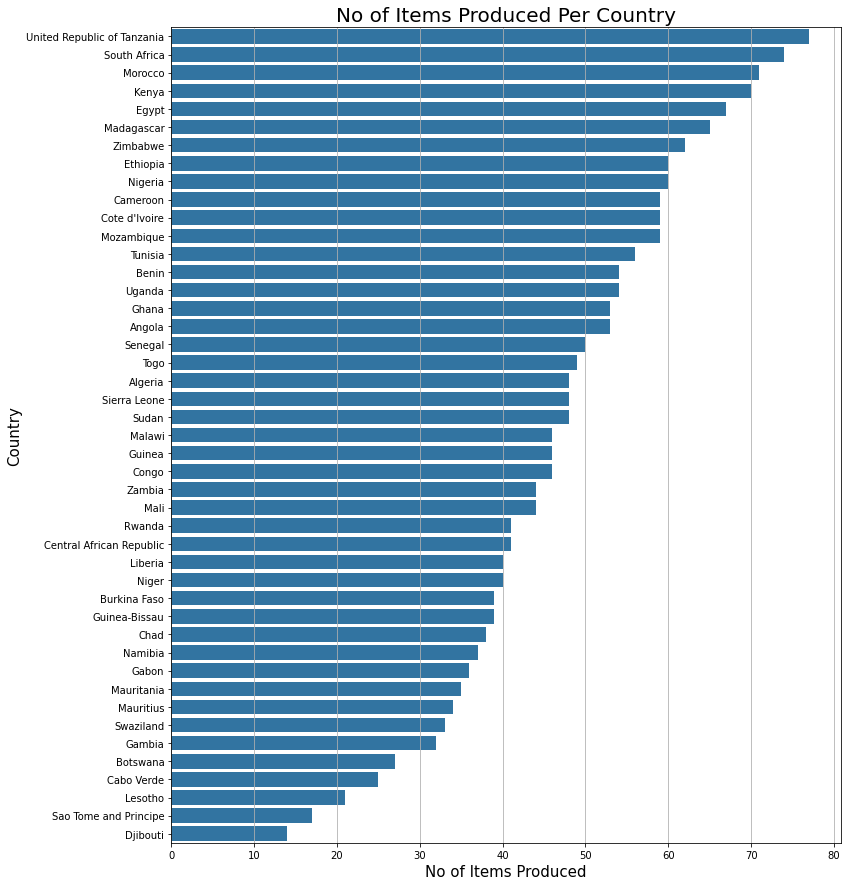

In [25]:
plt.figure(figsize=(12,15))
plt.grid(b=True, which='major', axis='x')

colour=sns.color_palette()[0]
order = Production_Produce1['Country'].value_counts().index

sns.countplot(y='Country', data=Production_Produce1, order=order, color= colour)

plt.title('No of Items Produced Per Country', fontsize=20)
plt.xlabel('No of Items Produced', fontsize=15)
plt.ylabel('Country', fontsize=15)

plt.show()

According to the graph above, United Republic of Tanzania, South Africa, Morocco and Kenya produced the most number of food items respectively. They each produce more than 70 food items.

Djibouti, Sao Tome and Principe, Lesotho and Cabo Verde produced the least number of food items respectively

### Overall Food Items Produced

In [26]:
Production_Item = Production.groupby(['Item'], as_index=False)[['Item', 'Value']].sum()
Production_Item.sort_values(by='Value', axis=0, ascending=False, inplace=True)
Production_Item.head()

,Item,Value
12,Cassava and products,1118948
82,Sugar cane,887008
40,Maize and products,574948
93,Yams,511523
90,"Vegetables, Other",410403


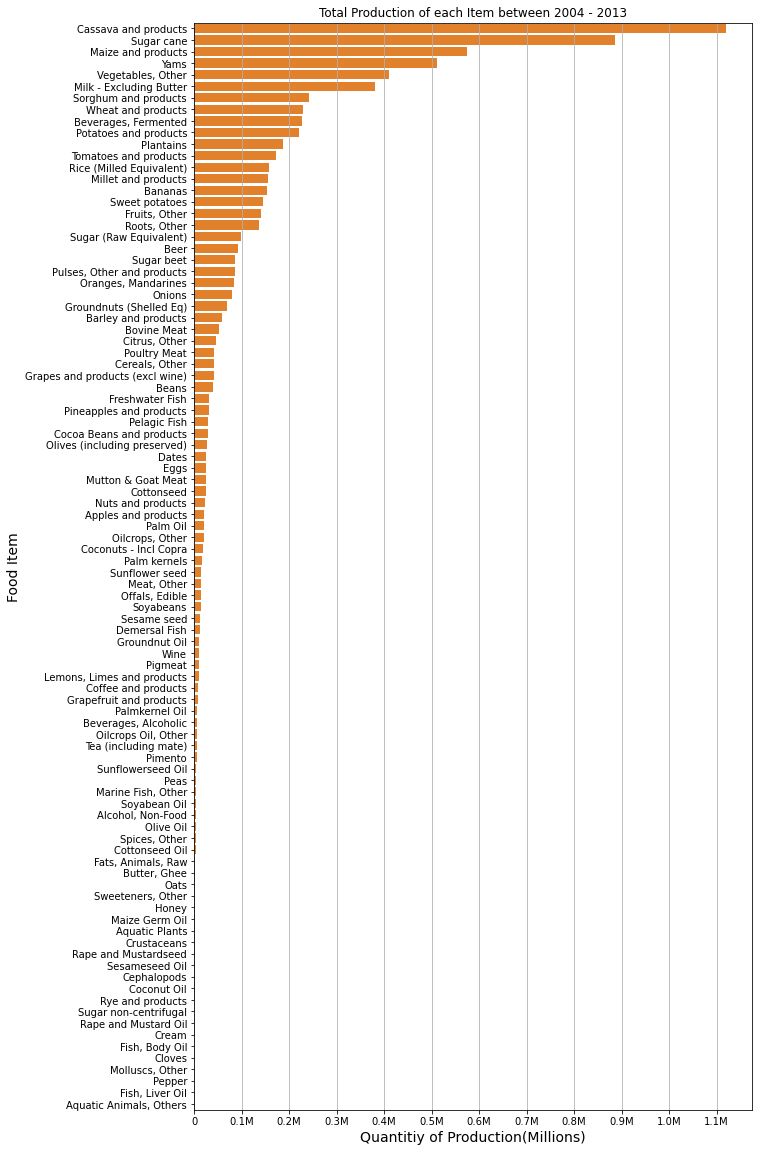

In [27]:
plt.figure(figsize=(10,20))
plt.grid(b=True, which='major', axis='x')
colour = sns.color_palette()[1]

sns.barplot(data=Production_Item,  x= 'Value',  y= 'Item', color=colour)
plt.title('Total Production of each Item between 2004 - 2013')
plt.xlabel('Quantitiy of Production(Millions)', fontsize=14)
plt.ylabel('Food Item', fontsize=14)

ticks = np.arange(0, 1.2e6, 0.1e6)
labels = [0, '0.1M', '0.2M', '0.3M', '0.4M', '0.5M', '0.6M', '0.7M', '0.8M', '0.9M', '1.0M', '1.1M']
plt.xticks(ticks, labels)

plt.show()

The above graph shows that Cassava and its prodcuts and Sugar Cane respectively are more produced than other food items.
The graph shows that Cassava and its products only are produced over twice more than the third ranking most produced food item (maize and products)

### Supply Per Country between 2004 and 2006

In [28]:
#Filter out the year 2004, 2005 and 2006
Supply_2004_to_2006 = Supply[Supply['Year'].isin([2004,2005,2006])]
Supply_2004_to_2006.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
10,Angola,2004,2030
11,Angola,2005,2077


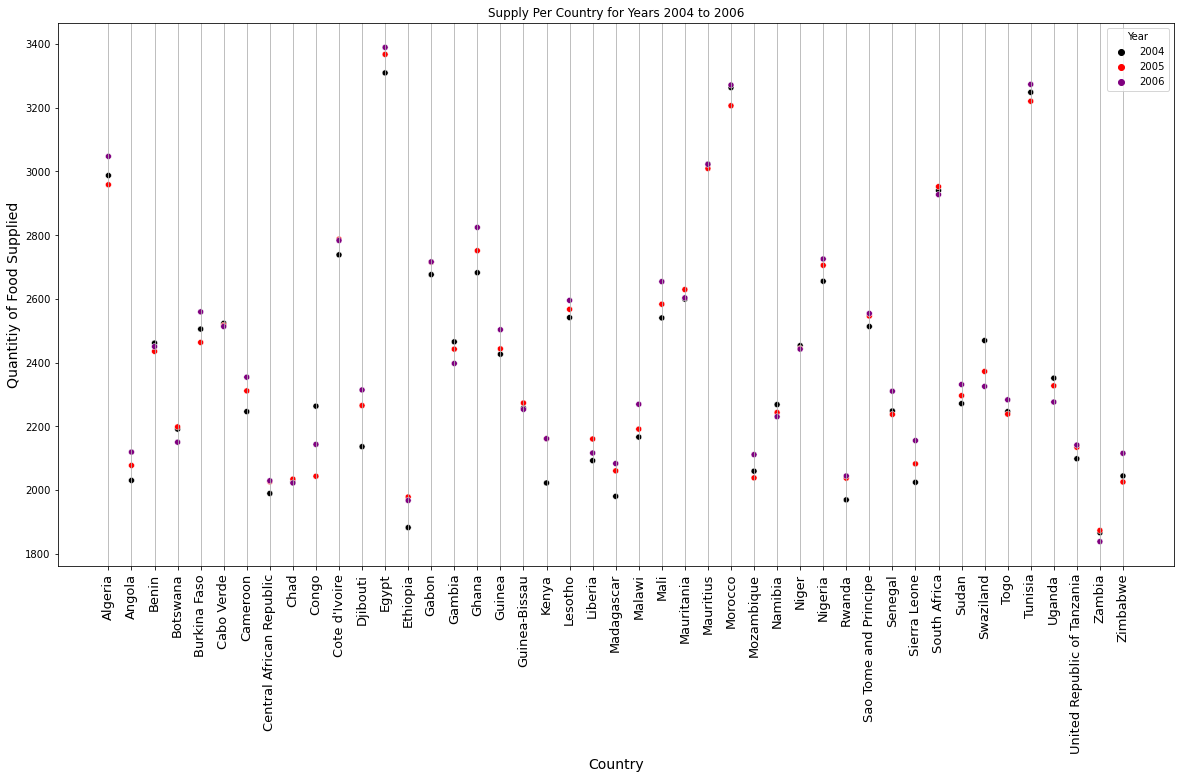

In [29]:
plt.figure(figsize=(20,10))
plt.grid(b=True, which='major', axis='x')
sns.scatterplot(data = Supply_2004_to_2006, x= 'Country', y='Value', hue= 'Year', palette=['black', 'red', 'purple'])

plt.title('Supply Per Country for Years 2004 to 2006') 

plt.xlabel('Country', fontsize=14)
plt.ylabel('Quantitiy of Food Supplied', fontsize=14)
plt.xticks(rotation=90, fontsize=13)

plt.show()

Egypt, Morocco and Tunisia are the top 3 Food Suppliers between 2004 and 2006

### Rice Producing Countries

In [30]:
Production_Rice = Production[(Production['Item'] == 'Rice (Milled Equivalent)') & (Production['Value'] != 0)].drop(labels='Item', axis=1)
Production_Rice.head()

,Country,Year,Value
590,Angola,2004,9
591,Angola,2005,6
592,Angola,2006,3
593,Angola,2007,3
594,Angola,2008,6


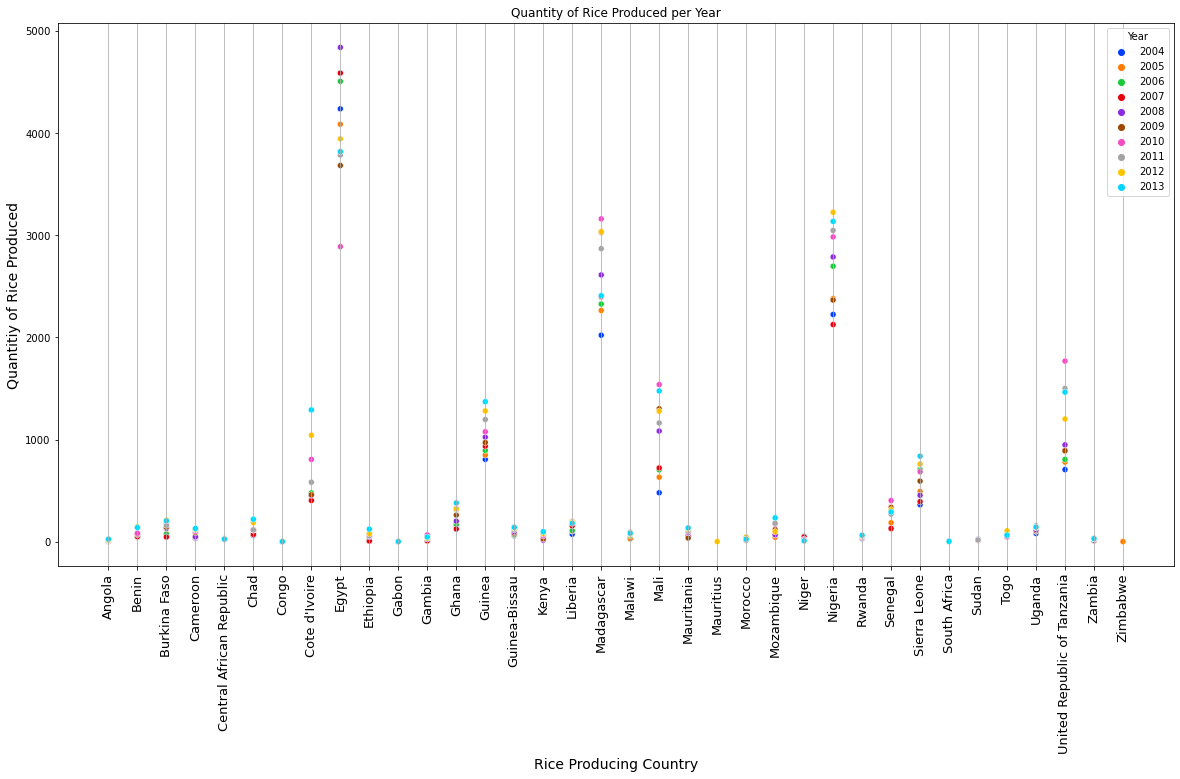

In [31]:
plt.figure(figsize=(20,10))
plt.grid(b=True, which='major', axis='x')

sns.scatterplot(data = Production_Rice, x= 'Country', y='Value', hue= 'Year', palette='bright')

plt.title('Quantity of Rice Produced per Year')
plt.xlabel('Rice Producing Country', fontsize=14)
plt.ylabel('Quantitiy of Rice Produced', fontsize=14)
plt.xticks(rotation=90, fontsize=13)

plt.show()

From the graph above, Egypt, Madagascar and Nigeria are the top Rice producing countries respectively

### Oats production in 2010

In [32]:
Production_Oats = Production[(Production['Item'] == 'Oats') & (Production['Year'] == 2010) & (Production['Value'] != 0)].sort_values(by='Value', axis=0)
Production_Oats.head()

,Country,Item,Year,Value
22516,Zimbabwe,Oats,2010,1
20056,Tunisia,Oats,2010,2
9286,Kenya,Oats,2010,3
17816,South Africa,Oats,2010,34
13186,Morocco,Oats,2010,37


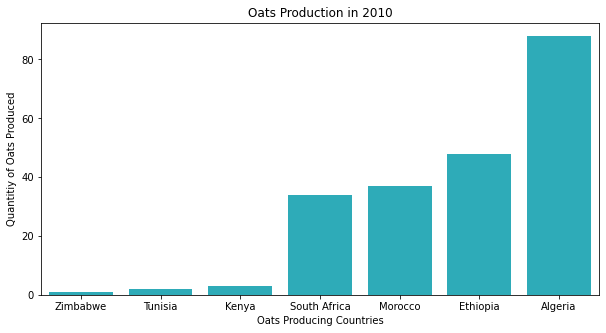

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data = Production_Oats, x= 'Country', y='Value', color=sns.color_palette()[9]) 

plt.title('Oats Production in 2010')
plt.xlabel('Oats Producing Countries')
plt.ylabel('Quantitiy of Oats Produced')

plt.show()

As seen on the graph above, only 7 countries produced Oats in 2010. Amongst these countries Algeria produced the most quantity of oats and Zimbabwe the least

### Correlation between average food consumption and production

In [34]:
Production_by_Country_Year = Production.groupby(['Country', 'Year'], as_index=False).sum()
Production_by_Country_Year.rename(columns={'Value': 'Production'}, inplace=True)
Production_by_Country_Year.head()

,Country,Year,Production
0,Algeria,2004,15536
1,Algeria,2005,15667
2,Algeria,2006,16417
3,Algeria,2007,14763
4,Algeria,2008,13841


In [35]:
Supply_renamed= Supply.rename(columns={'Value': 'Supply'})
Supply_renamed.head()

,Country,Year,Supply
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [36]:
#Merge Production dataframe and Supply dataframe
Production_Supply = pd.merge(left = Production_by_Country_Year, right = Supply_renamed, how='inner', on=['Country', 'Year'])
Production_Supply.head()

,Country,Year,Production,Supply
0,Algeria,2004,15536,2987
1,Algeria,2005,15667,2958
2,Algeria,2006,16417,3047
3,Algeria,2007,14763,3041
4,Algeria,2008,13841,3048


In [37]:
Production_Supply.corr('pearson')

,Year,Production,Supply
Year,1.000000,0.051149,0.122460
Production,0.051149,1.000000,0.310085
Supply,0.122460,0.310085,1.000000
